# Biopython: Working with Sequences
In this part we want to learn how to work with nucleotide and amino acid sequence files. For this we will use the package [*Biopython*](biopython.org), which provides a lot of functions to read/modify/write sequence files. 

By default `Anaconda` does not come with Biopython installed. But you can easily do this by opening a new terminal on your machine and running the following command:

```
conda install biopython
```

It will ask you whether you want to newly install the package, answer `yes` and wait for a bit for the installation to finish.


## Reading sequence files
The most common sequence formats you will encounter are `*.fasta` (the file ending is also sometimes written as `*.fa`) and `*.fastq` (or `*.fq`). Biopython comes with functions to read in these files. These can [be found in the `SeqIO` module](http://biopython.org/wiki/SeqIO) (see the link for further supported file formats if you're interested in that). 

[Download some test-sequences which are in sequences.zip](./sequences.zip) and extract them in your `Downloads` folder.

In [1]:
# you can load the SeqIO module from Biopython in the following way
from Bio import SeqIO

# to open and read a file, sequence by sequence, you can use the following command
for sequence in SeqIO.parse("sequences/coding_sequences.fasta","fasta"):
    print(sequence)
    break

ID: Laspu_000001
Name: Laspu_000001
Description: Laspu_000001
Number of features: 0
Seq('ATGCCTTCGCAAGAGGATTGCATTCAAAAAGATCCCTCCAAGTATCCCAATGAG...TGA', SingleLetterAlphabet())


The function `SeqIO.parse()` opens a file and reads it. The first positional parameter gives the location of the file we want to read (in this case `sequences/coding_sequences.fasta`), the second parameter specifies the file format (here a simple `fasta`). The easiest way to use `SeqIO` is in a simple `for`-loop. Unlike the regular `for i in open(file,"r")`, which returns a single line per loop-iteration, a `for`-loop with `SeqIO` returns a single sequence object per line. 

*note: we only use the `break` to keep the output clean, this stops the loop after the first iteration, so that we won't get all sequences printed into our `jupyter notebook`.*

Printing a single `sequence` we see that the returned object contains not only the sequence as `Seq`, but also some metadata, like the `ID`, `Name` and `Description`. We can access the individual fields of the sequence object like this:


In [2]:
for sequence in SeqIO.parse("sequences/coding_sequences.fasta","fasta"):
    print("this is the sequence name:", sequence.name)
    print("this is the sequence itself:", sequence.seq)
    break

this is the sequence name: Laspu_000001
this is the sequence itself: ATGCCTTCGCAAGAGGATTGCATTCAAAAAGATCCCTCCAAGTATCCCAATGAGATGGCTTGGTCGCACCGCTTTCAATATCTACCGTTTGATGTCAAATTTGACAAGAGAGGCGAAGGAGGGTCTCATACCAGAGTAATCAGCTACATCAACAACGTACACCCAGCAGCCCACCAATACTTCTACAGCGTTGTAGAAAAATTGATCGACGTAACCATCCCCATGTTCAACCAAACACTCACAGACATCAAAGCCCCCGGCTACTCAAATCAGCGTTTCCACGTCGCCGTCCTAGGACGCGACCCTATGATCGTAAAAGAACCAGGGGATTTCCATCCACCCCAACAGCGAGCCACACGACAATGGCTAGATTCCCAAGGCCGCTTCCAAGATTGGCTATTTGTAGATCTGGAGAAGGAGTTCTGGAACATTGGCCTGCAAATGATCCTGCGCGTTACAGAAATCAACCTCACCCCCGAAAAGCCGCGCTATGATGGTGAGGAATGGCATGTCCAGGGGCGAATGAATGAGCGTATTTGCGCCACTGCAGTCTACACCTACGGTATTCACAACACGACGCCGGCTTCCCTCTCCTTCCGCCGCCGCATTAACGCCGAAGAAGCCATGCTCGCCAAGGACTACATCCAGTCCCCGCCCTGGGCGCCTGAGCTCTACGGCGCCCGCTCCGGCGACCCGGTCATCCAGCATATGGGCGACATCACTATTTCTGAGAACCGGCTCGTCACATACCCGAACATCTTCCAAACGCGCTTGCTCCCGATTGAGCTAGTTGATATGAGCAAGCCAGGCCACGTCAAGCTACTAACGCTGCATCTTGTCGACCCCAACAGACGGATGATGAGCACAGCCATGGTACCGCCCCAACGGCGGGACTGGTGGGCGCGAGAGGTAAGGGTGGACAATGCGAGGT

The `sequence.seq` object can be sliced like a regular string: 

In [3]:
print(sequence.seq[0:10])

ATGCCTTCGC


But while the `sequence.seq` content looks like a regular `string`, it is indeed a special data type:

In [4]:
type(sequence.seq)

Bio.Seq.Seq

Thanks to this we can access some special functions which would not be available for regular strings:

In [5]:
print("sequence:", sequence.seq[0:10])
print("complement:", sequence.seq.complement()[:10])
print("---")
print("reverse:", sequence.seq[-10:][::-1])
print("reverse complement:", sequence.seq.reverse_complement()[:10])

sequence: ATGCCTTCGC
complement: TACGGAAGCG
---
reverse: AGTGTGTATC
reverse complement: TCACACATAG


We can not only get the complement and reverse complement, but also directly translate a coding sequence to amino acids:

In [6]:
sequence.seq.translate()

Seq('MPSQEDCIQKDPSKYPNEMAWSHRFQYLPFDVKFDKRGEGGSHTRVISYINNVH...YV*', HasStopCodon(ExtendedIUPACProtein(), '*'))

You can also write sequence files using `SeqIO`. For this you can open a new file-handle and subsequently use the `SeqIO.write()` function to write. 

*tip: this can easily be used for converting files from one format to another*

In [7]:
with open("example.faa", "w") as handle:
    SeqIO.write(sequence, handle, "fasta")
handle.close()

## Tasks
1. Read the sequences in `coding_sequences.fasta`, calculate the overall G/C content for each of the sequences and save them in a dictionary, using the `sequence.name` as the key and the G/C content as the value.
2. Translate the sequences in `coding_sequences.fasta` to amino acids and save them in a new file called `proteins.fasta`.
3. Some tools don't like to have the terminal stop codons `*` in the translated amino acids. Additionally create a second file `proteins_no_stop.fasta`, which does not contain the `*`.

## Reading FASTQ
`fastq` files can be read in the same way that `fasta` files are: 

In [8]:
for sequence in SeqIO.parse("sequences/rp_forward.fastq","fastq"):
    print(sequence)
    break

ID: M01527:37:000000000-A59BM:1:1101:13813:1836
Name: M01527:37:000000000-A59BM:1:1101:13813:1836
Description: M01527:37:000000000-A59BM:1:1101:13813:1836 1:N:0:1
Number of features: 0
Per letter annotation for: phred_quality
Seq('AAGAGTATTGTCACAAGACTGCTTGTTAATGCTATGCTGATTGGGCTTTGGTTG...CAC', SingleLetterAlphabet())


Reading in our sequencing reads we find a picture that's similar to the `fasta` files. Alas, unlike the `fasta` files, the `fastq` files contains additional metadata about our sequence, the `phred_quality`, which gives a quality score for each of the positions in the sequence. We can access these like this:

In [9]:
sequence.letter_annotations["phred_quality"][:10] # we only access the first 10 values, to keep things cleaner

[33, 33, 33, 33, 33, 37, 37, 37, 37, 33]

Let us now try to plot the average phred-values for each position over all of our sequencing reads:

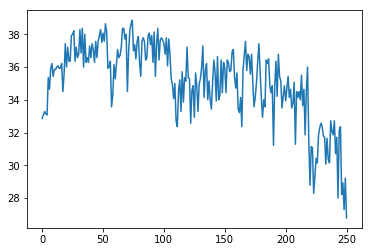

In [10]:
import matplotlib.pyplot
import numpy

# initialize empty list to store the list of quality-values per read
phred_scores_per_read = []

# read in all sequences and append the phred scores
for sequence in SeqIO.parse("sequences/rp_forward.fastq","fastq"):
    phred_scores_per_read.append(sequence.letter_annotations["phred_quality"])

# convert our "list of lists" into a proper numpy array
phred_scores_per_read = numpy.array(phred_scores_per_read)

# calculate the mean phred scores per position and 
# plot them with matplotlib

mean_phred_scores = phred_scores_per_read.mean(axis=0)
mean_phred_plot = matplotlib.pyplot.plot(mean_phred_scores)
matplotlib.pyplot.show()

## Tasks
We see that the quality scores drop towards the 3' end of our sequencing reads. This can lead to problems for subsequent analyses, like when mapping the reads against a reference genome or doing a *de novo* genome assembly. We thus want to investigate these effects a bit more:

1. Write a function `fastq_quality()` that takes a `fastq` file name as input parameter and returns the `phred_quality` values as a `numpy.array()`
2. Write an function `analyze()` that takes the `numpy.array()` generated by `fastq_quality()` and uses `matplotlib` to visualize the `mean`, `min`, `max` phred-scores per position (c.f. the inflammation examples earlier)
3. Generate these plots for all 6 `fastq` files that are contained in your `sequences` folder (remember the `glob` module). What differences do you find between the genomic read pairs (`rp_*`), the genomic mate pairs (`mp_*`) and the RNAseq read pairs (`rna_*`)?

**Important**

You might notice that the `rna_forward.fastq` and `rna_reverse.fastq` can't be handled by `phred_scores_per_read.mean(axis=0)`. This is because the sequences in these files are of different lengths! You can get around this by making sure that all rows (i.e. each list of phred scores) have the same length nevertheless. To achieve this you can fill up the shorter rows with `0` until they are of the same length. You can use `numpy` to fix this:

```
max_len = numpy.max([len(row) for row in phred_scores])
phred_scores = numpy.asarray([numpy.pad(row, (0, max_len - len(row)), 'constant', constant_values=0) for row in phred_scores])
```
After modifying your phred-score `numpy.array()` like this you can use `.mean(axis=0)` as you would expect (Don't be too concerned about how this works).

In [ ]:
def fastq_quality(sequence_file):
    phred_scores_per_read = []
    for sequence in SeqIO.parse(sequence_file,"fastq"):
        phred_scores_per_read.append(sequence.letter_annotations["phred_quality"])

    # convert our "list of lists" into a proper numpy array
    phred_scores_per_read = numpy.array(phred_scores_per_read)
    return phred_scores_per_read

def analyze(phred_scores):
    max_len = numpy.max([len(a) for a in phred_scores])
    phred_scores = numpy.asarray([numpy.pad(a, (0, max_len - len(a)), 'constant', constant_values=0) for a in phred_scores])
    mean_phred_scores = phred_scores.mean(axis=0)
    mean_phred_plot = matplotlib.pyplot.plot(mean_phred_scores)
    matplotlib.pyplot.show()

import glob
for i in glob.glob("sequences/*.fastq"):
    print(i)
    phred_scores = fastq_quality(i)
    analyze(phred_scores)